In [1]:
'''

Nearest Search should be in LAB color space


'''
from sklearn.cluster import KMeans
import skimage
import scipy.misc
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def get_img(img_path):
    img = scipy.misc.imread(img_path, mode = 'RGB')
    return img

def rgb2lab(image):
    '''
    L range: 0 ~ 100
    a range: -128 ~ 127
    b range: -128 ~ 127
    
    '''
    lab_color = skimage.color.rgb2lab(image)
    return lab_color


def lab2rgb(image):
    rgb_color = skimage.color.lab2rgb(image)
    return rgb_color


def nearest_search(image, palette):
    '''
    Palette shape: (16, 16, 3)
    
    '''
    img_shape = image.shape
    height = img_shape[0] 
    width = img_shape[1] 
    new_img = np.zeros(img_shape)
    for i in range(height):
        for j in range(width):
            index = find_min_idx(np.sum((image[i, j, :] - palette)**2,2))
            new_img[i, j, :] = palette[index[0], index[1], :]
    
    return new_img



def find_min_idx(x):
    k = x.argmin()
    ncol = x.shape[1]
    return np.int(k/ncol), k%ncol

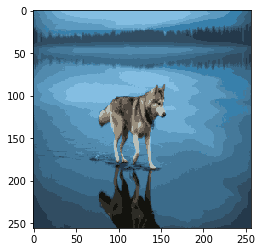

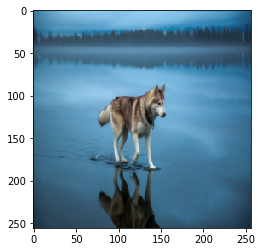

In [72]:
img = get_img('C:\\Users\\Orion_Peng\\Pictures\\Saved Pictures\\dog.jpg')
resize = scipy.misc.imresize(img, (256, 256))

resize_lab = rgb2lab(resize)

ab_reshape = np.reshape(resize_lab,(256 * 256, 3))

kmeans = KMeans(n_clusters=16, max_iter=100, random_state=0, n_jobs = -1).fit(ab_reshape)
palette = kmeans.cluster_centers_
palette = np.reshape(palette,(4,4,3)) ###????

new = nearest_search(resize_lab, palette)

new = lab2rgb(new)

plt.figure()
plt.imshow(new)
plt.figure()
plt.imshow(resize)

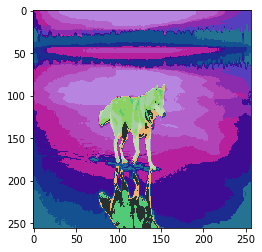

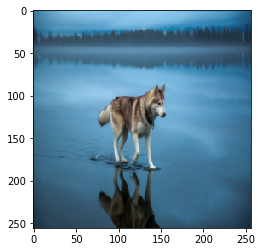

In [5]:


img = get_img('C:\\Users\\Orion_Peng\\Pictures\\Saved Pictures\\dog.jpg')
resize = scipy.misc.imresize(img, (256, 256))

resize_hsv = skimage.color.rgb2hsv(resize)

ab_reshape = np.reshape(resize_hsv,(256 * 256, 3))

kmeans = KMeans(n_clusters=16, max_iter=100, random_state=0, n_jobs = -1).fit(ab_reshape)
palette = kmeans.cluster_centers_
palette = np.reshape(palette,(4,4,3)) ###????

new = nearest_search(resize_hsv, palette)

new = skimage.color.rgb2hsv(new)

plt.figure()
plt.imshow(new)
plt.figure()
plt.imshow(resize)

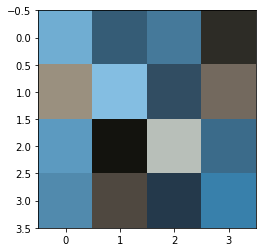

In [74]:
'''

Generated Palette/LAB Space

'''
plt.imshow(lab2rgb(palette))

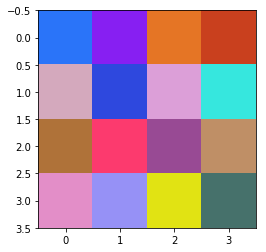

In [67]:
'''

Generated Palette/RGB Space

'''

plt.imshow(palette)